# Transfer learning with pre-trained models

- Use pre-trained models to classify the images of the CIFAR100
- We can use the knowledge they already have to better classify the images without the need to train the Deep learning model

## Data loading and processing

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

# Model Prep

### ResNet50

(pretrained model 1)

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 100s 1us/step


### VGG16

(pretrained model 2)

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 104s 2us/step


### MobileNetV2

(pretrained model 3)

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\sunil\AppData\Local\Temp\ipykernel_12676\3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Finetuning and further training

In [5]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(X_train_resnet50   , y_train, epochs=epochs, validation_data=(X_test_resnet50, y_test))



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(X_train_vgg16   , y_train, epochs=epochs, validation_data=(X_test_vgg16, y_test))



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train, epochs=epochs, validation_data=(X_test_mobilenetv2, y_test))

178
22
157
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 642s 402ms/step - accuracy: 0.3369 - loss: 2.6650 - val_accuracy: 0.4009 - val_loss: 2.3206
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 614s 393ms/step - accuracy: 0.4645 - loss: 1.9944 - val_accuracy: 0.4388 - val_loss: 2.2028
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 557s 356ms/step - accuracy: 0.5552 - loss: 1.5934 - val_accuracy: 0.4422 - val_loss: 2.3409
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 388s 246ms/step - accuracy: 0.0647 - loss: 4.6121 - val_accuracy: 0.0705 - val_loss: 3.9817
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 372s 238ms/step - accuracy: 0.0925 - loss: 3.6927 - val_accuracy: 0.1138 - val_loss: 3.4815
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 376s 241ms/step - accuracy: 0.1398 - loss: 3.3737 - val_accuracy: 0.1625 - val_loss: 3.2557
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 80ms/step - accuracy: 0.1749 - loss: 3.4670 - val_accuracy: 0.1113 - val_loss: 4.5574
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - a

## Model evaluation

In [6]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.4422 - loss: 2.3409
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 152ms/step - accuracy: 0.1625 - loss: 3.2557
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.2451 - loss: 3.3489
ResNet50 Accuracy: 0.44
VGG16 Accuracy: 0.16
MobileNetV2 Accuracy: 0.25


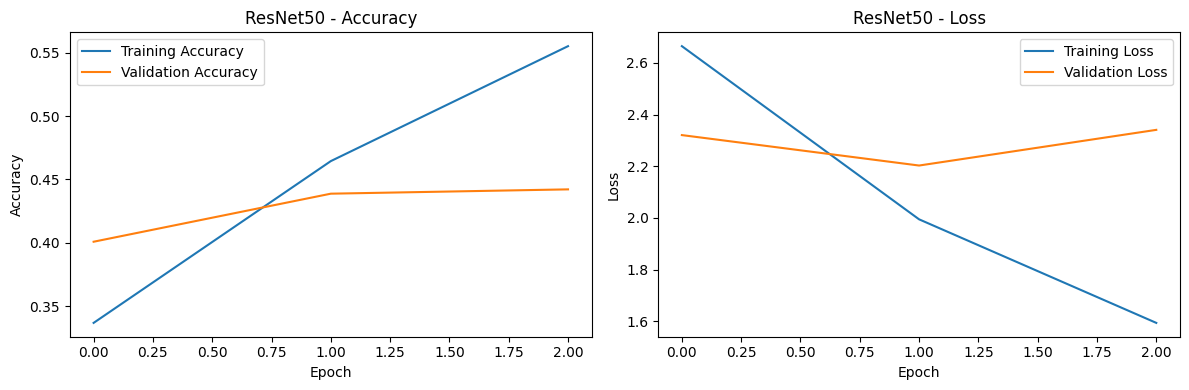

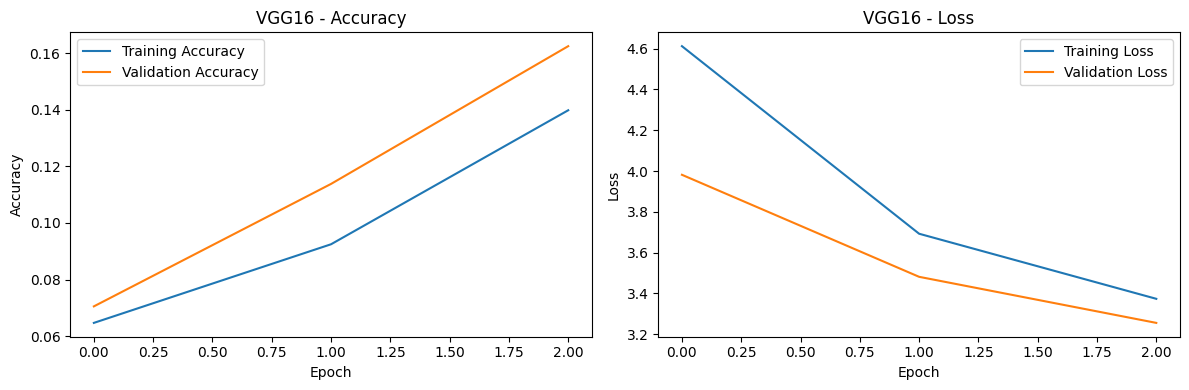

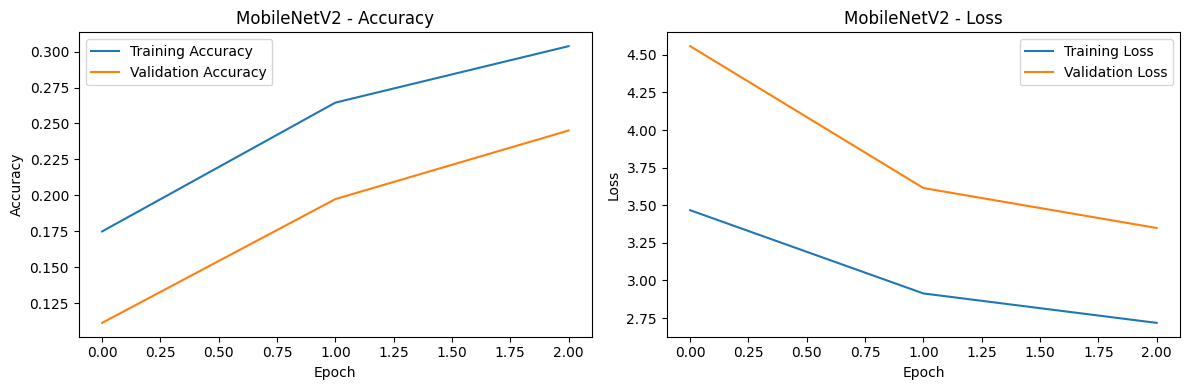

In [7]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

In [ ]:
history_resnet50 = model_resnet50.fit(X_train_resnet50, y_train, epochs=22, validation_data=(X_test_resnet50, y_test))

# Transfer learning on the Oxford flowers dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2


In [2]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [3]:
# split the dataset into training and testing sets for each of the three models
train_dataset_resnet50 = train_dataset.map(lambda x, y: (preprocess_resnet50(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))
validation_dataset_resnet50 = validation_dataset.map(lambda x, y: (preprocess_resnet50(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))
test_dataset_resnet50 = test_dataset.map(lambda x, y: (preprocess_resnet50(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))

train_dataset_vgg16 = train_dataset.map(lambda x, y: (preprocess_vgg16(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))
validation_dataset_vgg16 = validation_dataset.map(lambda x, y: (preprocess_vgg16(tf.image.resize(x, (32, 32))), y))
test_dataset_vgg16 = test_dataset.map(lambda x, y: (preprocess_vgg16(tf.image.resize(x, (32, 32))), y))

train_dataset_mobilenetv2 = train_dataset.map(lambda x, y: (preprocess_mobilenetv2(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))
validation_dataset_mobilenetv2 = validation_dataset.map(lambda x, y: (preprocess_mobilenetv2(tf.image.resize(x, (32, 32))), y))
test_dataset_mobilenetv2 = test_dataset.map(lambda x, y: (preprocess_mobilenetv2(tf.image.resize(x, (32, 32))), y))


## Model Prep

### ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

#### VGG16

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

#### MobileNetV2

In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)


C:\Users\sunil\AppData\Local\Temp\ipykernel_6668\2988658722.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


## Finetuning and training

In [14]:
# needs batching and prefetching for performance
BATCH_SIZE = 32

train_dataset_resnet50 = train_dataset_resnet50.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_resnet50 = validation_dataset_resnet50.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_resnet50 = test_dataset_resnet50.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset_vgg16 = train_dataset_vgg16.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_vgg16 = validation_dataset_vgg16.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_vgg16 = test_dataset_vgg16.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset_mobilenetv2 = train_dataset_mobilenetv2.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_mobilenetv2 = validation_dataset_mobilenetv2.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_mobilenetv2 = test_dataset_mobilenetv2.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [8]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True


model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_resnet50 = model_resnet50.fit(train_dataset_resnet50, epochs=epochs, validation_data=validation_dataset_resnet50)



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True


model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_vgg16 = model_vgg16.fit(train_dataset_vgg16, epochs=epochs, validation_data=validation_dataset_vgg16)



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True


model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_mobilenetv2 = model_mobilenetv2.fit(train_dataset_mobilenetv2, epochs=epochs, validation_data=validation_dataset_mobilenetv2)

178
22
157
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 467ms/step - accuracy: 0.1088 - loss: 4.6171 - val_accuracy: 0.0245 - val_loss: 12.8733
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.7637 - loss: 1.2154 - val_accuracy: 0.1265 - val_loss: 7.1090
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.9451 - loss: 0.2484 - val_accuracy: 0.2000 - val_loss: 5.1832
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step - accuracy: 0.0441 - loss: 22.1376 - val_accuracy: 0.0627 - val_loss: 6.1200
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.0902 - loss: 4.7088 - val_accuracy: 0.0784 - val_loss: 4.7566
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.1363 - loss: 4.0279 - val_accuracy: 0.1137 - val_loss: 4.6697
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.0176 - loss: 4.8694 - val_accuracy: 0.0265 - val_loss: 5.3446
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.2706 - loss: 3.4266 - val_acc

## Model Evaluation

In [15]:
results_resnet50 = model_resnet50.evaluate(test_dataset_resnet50)
results_vgg16 = model_vgg16.evaluate(test_dataset_vgg16)
results_mobilenetv2 = model_mobilenetv2.evaluate(test_dataset_mobilenetv2)

print(f'ResNet50 Loss: {results_resnet50[0]:.4f}, Accuracy: {results_resnet50[1]:.4f}')
print(f'VGG16 Loss: {results_vgg16[0]:.4f}, Accuracy: {results_vgg16[1]:.4f}')
print(f'MobileNetV2 Loss: {results_mobilenetv2[0]:.4f}, Accuracy: {results_mobilenetv2[1]:.4f}')


193/193 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.1895 - loss: 5.1552
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.1003 - loss: 4.5820
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.0234 - loss: 11.6810
ResNet50 Loss: 5.1552, Accuracy: 0.1895
VGG16 Loss: 4.5820, Accuracy: 0.1003
MobileNetV2 Loss: 11.6810, Accuracy: 0.0234


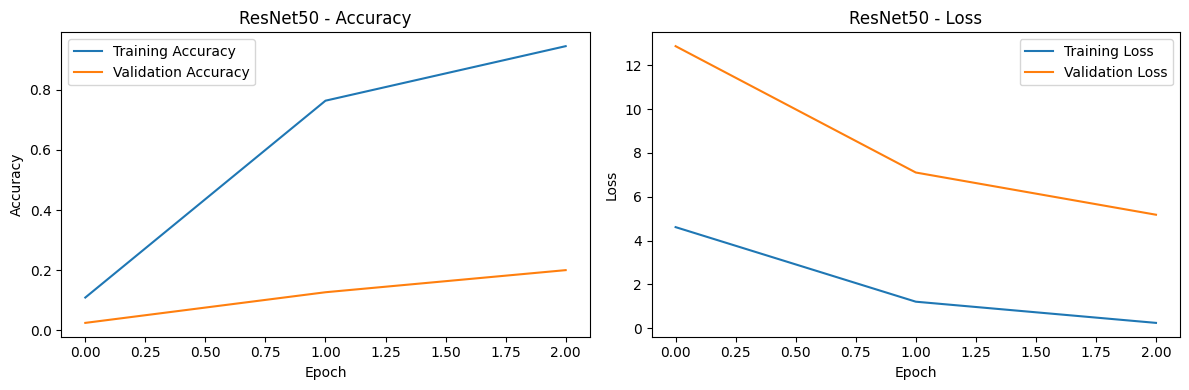

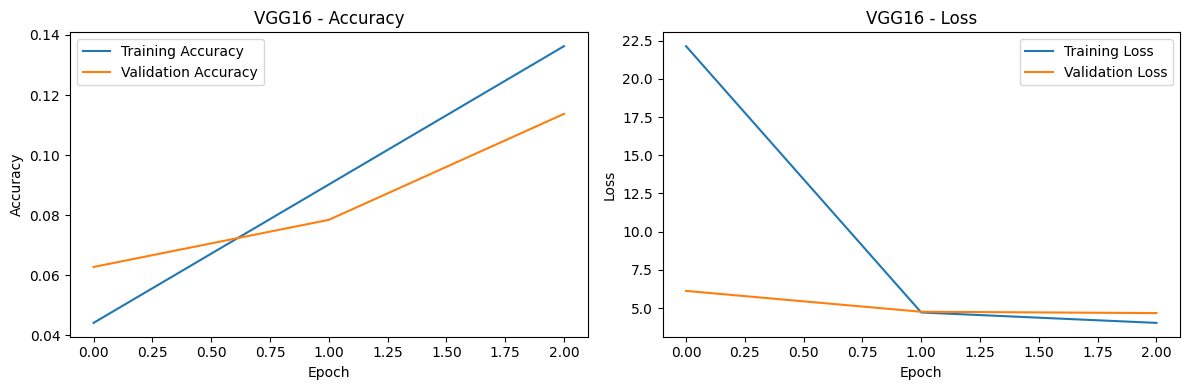

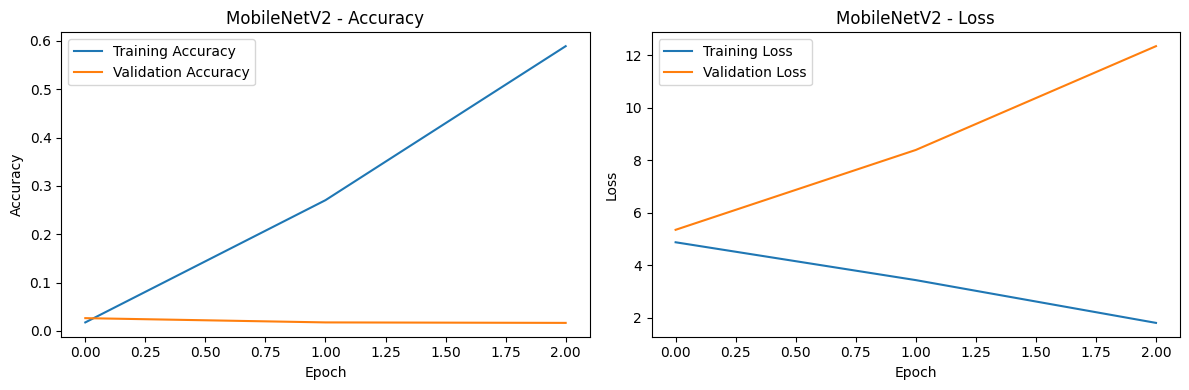

In [16]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')